In [2]:
#@Author: Zhuowen Li
#@LastEdit: 2021/8/28 下午4:41:24
#@Version: v1 base on anchor_reads_detail file(produce by porecplot_v2.4)
#@Description: 
import numpy as np
import pandas as pd
import math
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_dirs = ["/public/home/lizw/software/font"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20

from matplotlib.gridspec import GridSpec
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize

# anchor_cluster map(sort according to location combination )

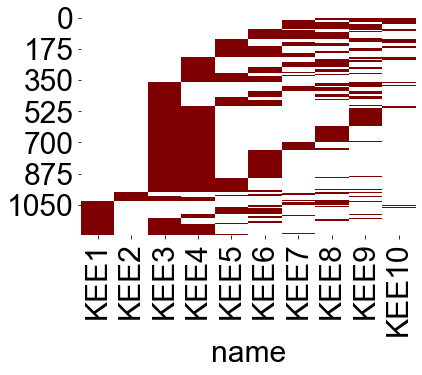

In [24]:
#DpnII_run04_kee.and4.MAPQ1_anchor_reads_detail.csv only have the alignment on the anchor sites,hold the anchor name
#DpnII_run08_kee.and4.MAPQ1_anchor_reads_detail.csv only have the alignment on the anchor sites,hold the anchor name
file = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/DpnII_run08_kee.and3.MAPQ1_anchor_reads_detial.csv'
anchor_and_detail = pd.read_table(file)
comb = pd.read_csv('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/DpnII_run08_kee.and3.MAPQ1_comb_sample.csv')
read_list = comb['read_name']
anchor = pd.read_csv('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/kee.bed',sep="\t",header=None,usecols=[0,1,2,3],names=['chrom','start','end','name'],converters={'chrom':str, 'start':int, 'end':int,'name':str},comment="#")
anchor_and_detail = anchor_and_detail.query('read_name in @read_list')

#viridis = cm.get_cmap('YlOrRd', 6)
#viridis = cm.get_cmap('YlOrBr', 6)
viridis = cm.get_cmap('OrRd', 6)
#viridis = cm.get_cmap('Oranges', 6)
#viridis = cm.get_cmap('RdPu', 6)
newcolors = viridis(np.linspace(0, 1, 256))
white = np.array([255/255, 255/255, 255/255, 1])
newcolors[:50, :] = white
newcmp = ListedColormap(newcolors)

read_anchor_matrix = anchor_and_detail.groupby(['read_name','anchor_name'])['pos'].count().unstack().fillna(0).reindex(anchor['name'], axis=1)
read_anchor_matrix_01 = read_anchor_matrix != 0
read_anchor_matrix_01_sort = read_anchor_matrix_01.sort_values(by=anchor['name'].to_list())
#make the read list of comb sort as ref,and sort the orginal matrix(contain the information of locus self interaction within one read)
read_comb_sort_list = read_anchor_matrix_01_sort.reset_index().iloc[:,0].to_list()
read_anchor_matrix_sort=read_anchor_matrix.reindex(read_comb_sort_list,axis=0)
g = sns.heatmap(read_anchor_matrix_sort.reset_index().iloc[:,1:],vmin=0,vmax=1,cmap=newcmp,cbar=False)
plt.savefig('anchorcluster.png',format = 'png',dpi=300,bbox_inches = 'tight')

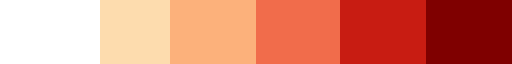

In [25]:
newcmp

In [26]:
import seaborn as sns

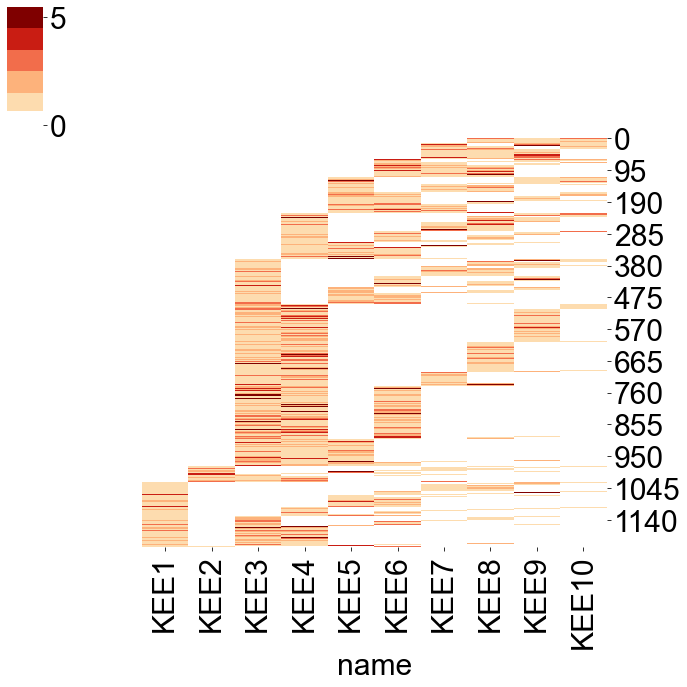

In [31]:
g = sns.clustermap(read_anchor_matrix_sort.reset_index().iloc[:,1:],vmin=0-0.5,vmax=5+0.5,cmap=newcmp, row_cluster=False, col_cluster=False)
plt.savefig('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/colorbar.png',format='png',bbox_inches='tight',dpi=500)

# draw the reads related to kee(3,4,7,8)

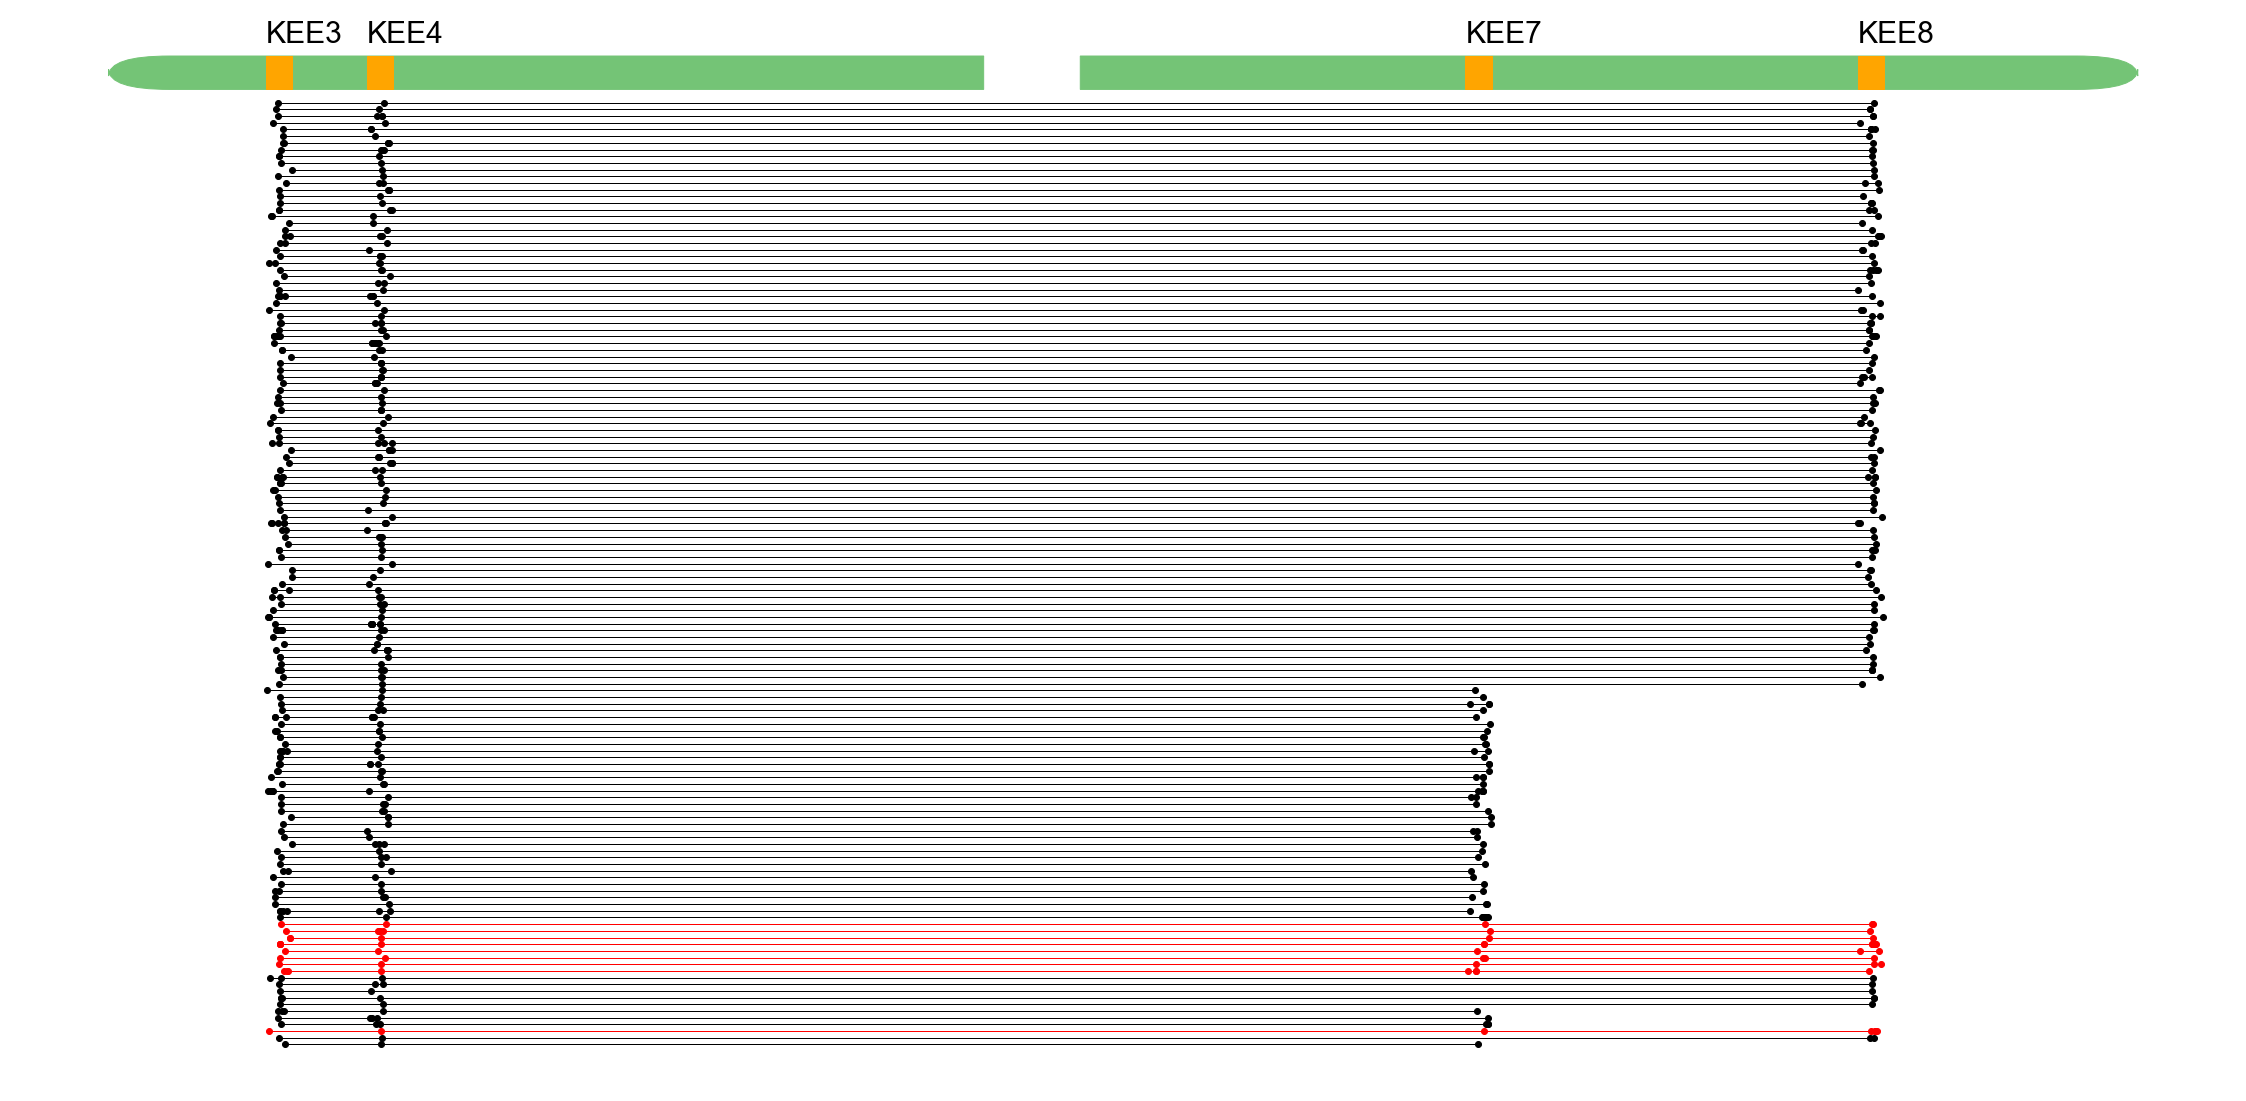

In [30]:
#select and3 reads related to kee(3,4,7,8),including kee(3,4,7)  kee(3,4,8) kee(3,8,7) kee(4,8,7) kee(3,4,8,7)
kee_3478_comb = pd.read_csv('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/kee_3478_and3.csv')
kee_3478_comb_list = list(kee_3478_comb['read_name'].drop_duplicates())
read_anchor_matrix_01_sort_3478 = read_anchor_matrix_01_sort.query('read_name in @kee_3478_comb_list')
#try to make the reads located below same as the sorting sequencing of the above anchor_cluster map
read_anchor_matrix_01_sort_3478_sort = read_anchor_matrix_01_sort_3478.sort_values(by=anchor['name'].to_list())
kee_3478_comb_list_sort = read_anchor_matrix_01_sort_3478_sort.index.to_list()

#anchor_filter_merge.csv: all alignment information in and3 reads
fragment_detial_file = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/DpnII_run08_kee.and3.MAPQ1_anchor_filter_merge.csv'
fragment_detial_df = pd.read_table(fragment_detial_file,index_col=0)
fragment_detial_df_select = fragment_detial_df.query('read_name in @kee_3478_comb_list')

anchor = pd.read_csv('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/kee.bed',sep="\t",header=None,usecols=[0,1,2,3],names=['chrom','start','end','name'],converters={'chrom':str, 'start':int, 'end':int,'name':str},comment="#")
anchor_select= anchor.query('name=="KEE3" or name=="KEE4" or name=="KEE7" or name=="KEE8"')

#genome prepare
genome = pd.read_table('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.2/kee/chr3p_chr4q.bed',header=None,names=['chrom','geno_start','geno_end'],converters = {'chrom':str})
genome['show_size'] = genome.eval('geno_end-geno_start')
step=genome['show_size'].sum()//20
stop=(len(genome))*step
inter_array = np.arange(start=0,stop=stop,step=step)

#inter_array 提供染色体的间隙
genome['cum'] = np.array(genome['show_size'].cumsum())+inter_array 
start_point_array = np.array(genome['cum'][:-1])+step
genome['geno_show_start'] = np.insert(start_point_array,0,[0])
max_value = genome['cum'].iloc[-1]
genome['geno_draw_start'] = genome['geno_show_start']/max_value
genome['geno_draw_width'] = genome['show_size']/max_value
genome_draw = genome.reindex(['chrom','geno_draw_start','geno_draw_width'],axis=1)

#anchor prepare
anchor_geno = pd.merge(anchor_select,genome.reindex(['chrom','geno_start','geno_show_start'],axis=1),on='chrom')
anchor_geno['show_size'] = anchor_geno['end']-anchor_geno['start']
anchor_geno['anchor_draw_start'] = anchor_geno.eval('(start-geno_start+geno_show_start)/@max_value')
anchor_geno['anchor_draw_width'] = anchor_geno['show_size']/max_value
anchor_geno_draw = anchor_geno.reindex(['chrom','name','anchor_draw_start','anchor_draw_width'],axis=1)

#fragment prepare
fragment_draw = fragment_detial_df_select.reindex(['chrom','read_name','pos'],axis=1)
fragment_draw['chrom'] = fragment_draw['chrom'].astype('str')
#when merged with geno, alignments in other region of the genome would be ignored and don't plot 
fragment_draw_geno = pd.merge(fragment_draw,genome.reindex(['chrom','geno_start','geno_end','geno_show_start'],axis=1),on='chrom')
fragment_draw_geno['frag_mid_draw'] = fragment_draw_geno.eval('(pos - geno_start + geno_show_start) / @max_value')
fragment_draw_geno['read_name'] = fragment_draw_geno['read_name'].astype('category').cat.set_categories(kee_3478_comb_list_sort)
fragment_draw_geno_sort = fragment_draw_geno.sort_values(by='read_name')
fragment_draw_geno_sort_filter = fragment_draw_geno_sort.query('(pos <= geno_end) and (pos >= geno_start)')

#outline the reads that capture kee(3,4,7,8)
kee_3478_only_comb = pd.read_csv('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/kee3_kee4_kee7_kee8.comb.csv')
kee_3478_only_list = list(kee_3478_only_comb['read_name'])

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
import seaborn as sns
import matplotlib.font_manager as font_manager
font_dirs = ["/public/home/lizw/software/font"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 30

fig,ax = plt.subplots(1,figsize=(40,20))

#because the first half of the genome is short arm, and the other is the long arm, define the different direction of the round cornor
n = 0
for geno_r in genome_draw.itertuples(index=None):
    geno_chrom,geno_start,geno_width = geno_r
    
    round_para = 0.03
    full_x = geno_start+geno_width
    basic_x = geno_start
    full_y = 0.95+0.05
    basic_y = 0.95
    
    if n == 0:
        verts = [(basic_x+round_para, basic_y),
             (full_x-round_para, basic_y), # start of the lower right corner
             (full_x, basic_y), # intermediate point (as if it wasn't rounded)
             (full_x, basic_y), # end point of the lower right corner
             (full_x, full_y), # move to the next point etc.
             (full_x, full_y),
             (full_x-round_para, full_y),
             (basic_x+round_para, full_y),
             (basic_x, full_y),
             (basic_x, full_y-round_para),
             (basic_x, basic_y+round_para),
             (basic_x, basic_y),
             (basic_x+round_para, basic_y)]
    elif n == 1:
        verts = [(basic_x+round_para, basic_y),
             (full_x-round_para, basic_y), # start of the lower right corner
             (full_x, basic_y), # intermediate point (as if it wasn't rounded)
             (full_x, basic_y+round_para), # end point of the lower right corner
             (full_x, full_y-round_para), # move to the next point etc.
             (full_x, full_y),
             (full_x-round_para, full_y),
             (basic_x+round_para, full_y),
             (basic_x, full_y),
             (basic_x, full_y),
             (basic_x, basic_y),
             (basic_x, basic_y),
             (basic_x+round_para, basic_y)]
    
    codes = [mpath.Path.MOVETO,
         mpath.Path.LINETO,
         mpath.Path.CURVE3,
         mpath.Path.CURVE3,
         mpath.Path.LINETO,
         mpath.Path.CURVE3,
         mpath.Path.CURVE3,
         mpath.Path.LINETO,
         mpath.Path.CURVE3,
         mpath.Path.CURVE3,
         mpath.Path.LINETO,
         mpath.Path.CURVE3,
         mpath.Path.CURVE3]
        
    n += 1
    rounded_verts = mpath.Path(verts, codes)
    rounded_verts = patches.PathPatch(rounded_verts, color='#74C476', lw=1)
    ax.add_patch(rounded_verts)

for anch_r in anchor_geno_draw.itertuples(index=None):
    anch_chrom,anch_name,anch_start,anch_width = anch_r
    #ax.add_patch(plt.Rectangle((anch_start,0.95),anch_width,0.05,color='#FB6A4A',capstyle = 'butt'))
    ax.add_patch(plt.Rectangle((anch_start,0.95),anch_width,0.05,color='orange',capstyle = 'butt'))
    ax.text(anch_start,1.02,anch_name)
    
top = 0.93
for frag_i,frag_df in fragment_draw_geno_sort_filter.groupby('read_name'):
    frag_df_len = len(frag_df)
    if frag_i in kee_3478_only_list:
        color = 'red'
    else:
        color = 'k'
    frag_df_y = np.zeros(frag_df_len)+top
    ax.plot(frag_df['frag_mid_draw'],frag_df_y,'o-',color=color,linewidth=1)
    top -= 0.01

sns.despine(left=True,bottom=True)
plt.xticks([])
plt.yticks([])
plt.savefig('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/kee3478_read_detail_new.png',format='png',dpi=300,bbox_inches = 'tight')

In [33]:
fragment_draw_geno_sort_filter['read_name'].nunique()

142

In [10]:
kee_3478_only_list

['7cbd64a9-0f91-497c-bf5e-5f5422da53c8',
 '8715fd13-9464-4690-a274-c0cdb6c90630',
 'a2816531-0821-4b41-a3f8-131aed8883ae',
 'a2d97f30-35ff-4cb5-bd66-a970c5aea611',
 'aa10bad6-45bc-4ffa-bcc7-f227591dbec9',
 'ab67eb49-7d98-412f-be83-33b93a45f5d6',
 'd7840a92-d569-49a6-9aff-ad3f6650fb6a',
 'e2aea66f-c4d2-49e8-b8e2-63a8208989d7',
 '0c5aa378-06ad-440a-a788-d7faf2aa06ce']

In [3]:
kee_3478_comb = pd.read_csv('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/kee_3478_and3.csv')

ValueError: Only callable can be used as callback

# bar plot for kee3,4 and3 read count 

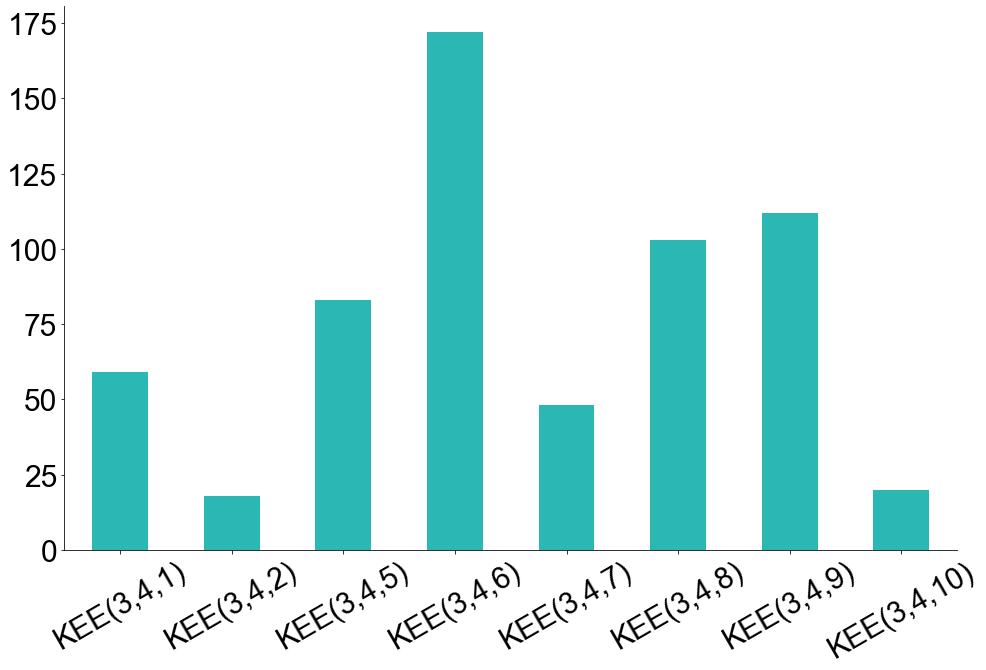

In [46]:
import pandas as pd
kee3_4_count_dis = pd.read_table("/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/kee3_4_and3_count.tsv",header=None,names=['Combinations','Read Counts'])
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
font_dirs = ["/public/home/lizw/software/font"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 30
f, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(16, 10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
kee3_4_count_dis.plot(kind='bar',x='Combinations',y='Read Counts',ax=ax,legend=False,color='#2BB7B3')
ax.set_xlabel('')
plt.xticks(rotation=30)
plt.savefig('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/kee3_4_and3_count.png',format='png',dpi=300,bbox_inches='tight')

# control

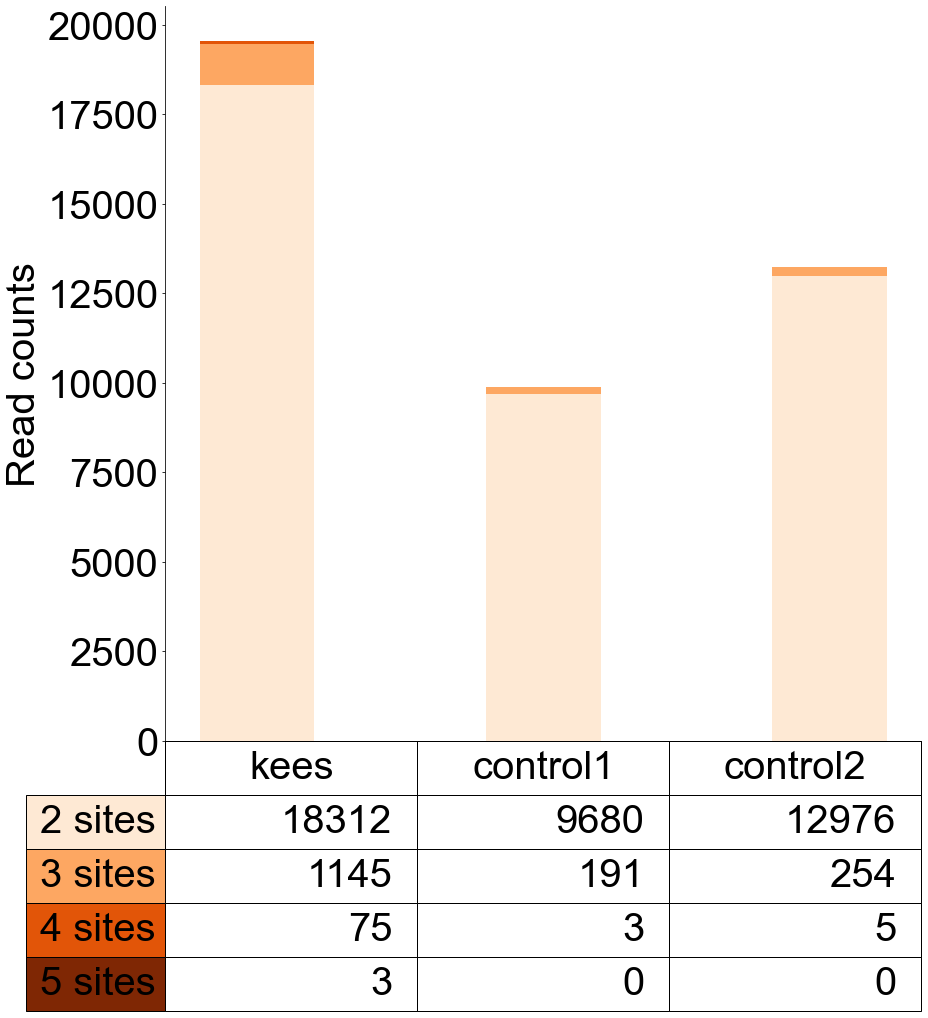

In [1]:
import pandas as pd
ab_group_df = pd.read_table('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/control_read_count.tsv',converters={'hubsize':int,'telomeres':int,'control1':int,'control2':int})
ab_group_df.fillna(0)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager
font_dirs = ["/public/home/lizw/software/font"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 40
fig,ax = plt.subplots(1,figsize=(15,15))


data = ab_group_df.iloc[:,1:].values
columns = ab_group_df.iloc[:,1:].columns.to_list()
rows = ['%d sites' % x for x in ab_group_df['hubsize'].to_list()]



# Get some pastel shades for the colors
colors = plt.cm.Oranges(np.linspace(0.1, 1, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
#colors = colors[::-1]
data_last = np.zeros(len(columns))
for row in range(n_rows):
    ax.bar(index, data[row], bar_width, bottom=data_last, color=colors[row])
    data_last+=data[row]
#ax.set_yscale('log')
    
# Reverse colors and text labels to display the last value at the top.

cell_text = ab_group_df.iloc[:,1:].values

# Add a table at the bottom of the axes
the_table = ax.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')
the_table.scale(1, 5)
the_table.set_fontsize(40)

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel('Read counts')
plt.xticks([])
sns.despine()

plt.savefig('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/control_bar.png',format='png',dpi=300,bbox_inches='tight')